In [14]:
import numpy as np
import matplotlib.pyplot as plt

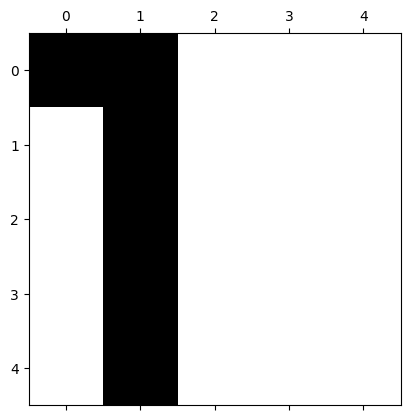

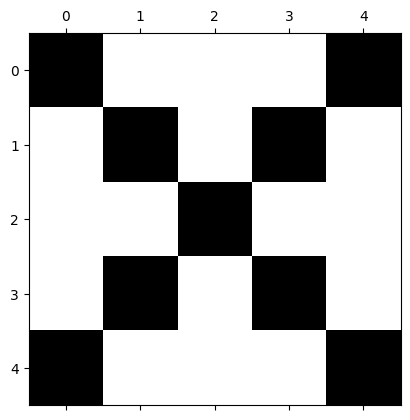

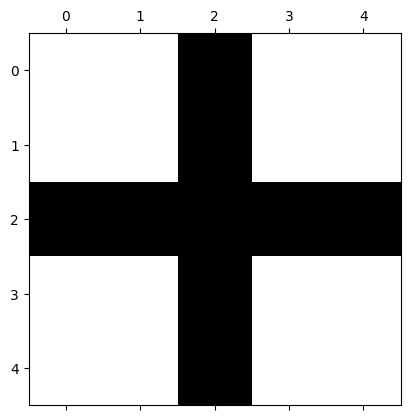

In [48]:
patterns = [
    np.array([
        [1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1]
    ]),
    np.array([
        [1, -1, -1, -1, 1],
        [-1, 1, -1, 1, -1],
        [-1, -1, 1, -1, -1],
        [-1, 1, -1, 1, -1],
        [1, -1, -1, -1, 1]
    ]),
    np.array([
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1]
    ])
]

for p in patterns:
    plt.matshow(p, cmap='gray_r')

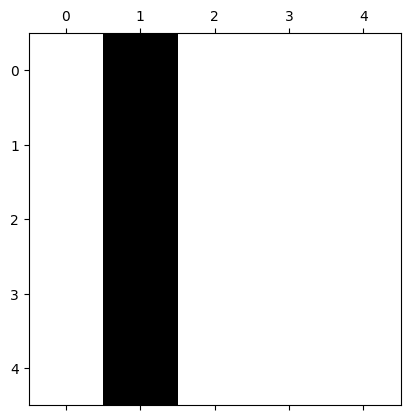

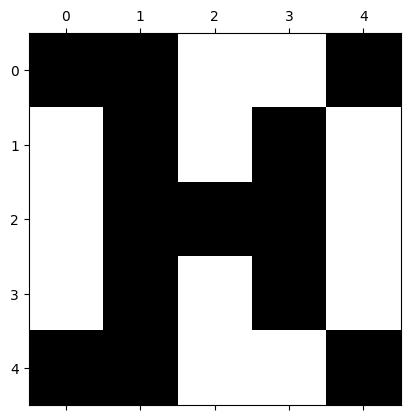

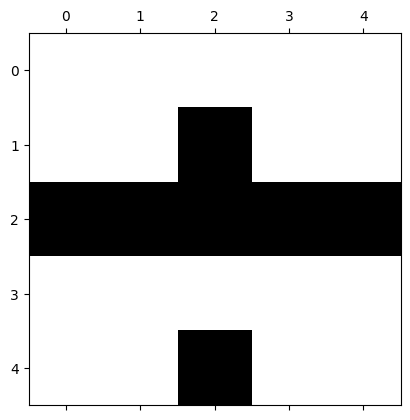

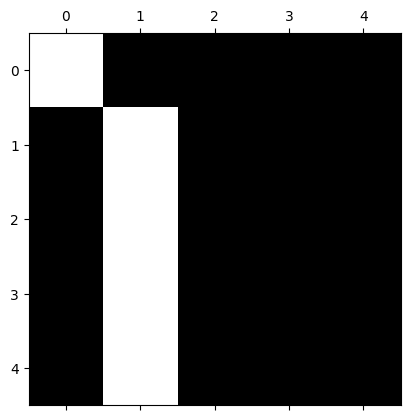

In [49]:
tests = [
    np.array([
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, -1, -1, -1]
    ]),
    np.array([
        [1, 1, -1, -1, 1],
        [-1, 1, -1, 1, -1],
        [-1, 1, 1, 1, -1],
        [-1, 1, -1, 1, -1],
        [1, 1, -1, -1, 1]
    ]),
    np.array([
        [-1, -1, -1, -1, -1],
        [-1, -1, 1, -1, -1],
        [1, 1, 1, 1, 1],
        [-1, -1, -1, -1, -1],
        [-1, -1, 1, -1, -1]
    ]),
    np.array([
        [-1, 1, 1, 1, 1],
        [1, -1, 1, 1, 1],
        [1, -1, 1, 1, 1],
        [1, -1, 1, 1, 1],
        [1, -1, 1, 1, 1]
    ])
]

for t in tests:
    plt.matshow(t, cmap='gray_r')

In [74]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size ** 2
        self.weights = np.zeros((self.size, self.size))
    
    def learn(self, pattern):
        self.weights = np.zeros((self.size, self.size))
        pattern = np.array(pattern).flatten()
        for i in range(self.size):
            for j in range(self.size):
                if i != j:
                    self.weights[i, j] += (2 * pattern[i] - 1) * (2 * pattern[j] - 1) / self.size
                    
    def recognize(self, pattern, max_iter=10):
        pattern = np.array(pattern).flatten()
        for _ in range(max_iter):
            for i in range(self.size):
                result = 0
                for j in range(self.size):
                    if j != i:
                        result += self.weights[i, j] * pattern[j]
                
                pattern[i] = 1 if result >= 0 else -1
                
        return pattern

In [76]:
network = HopfieldNetwork(len(patterns[0]))

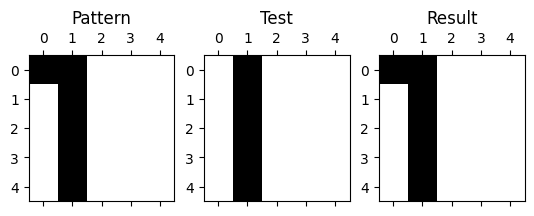

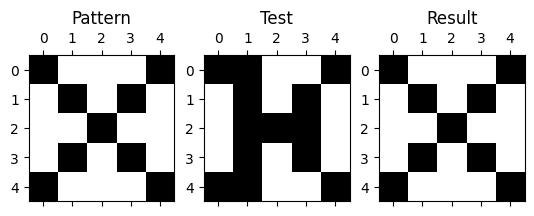

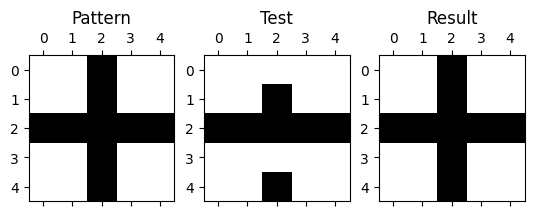

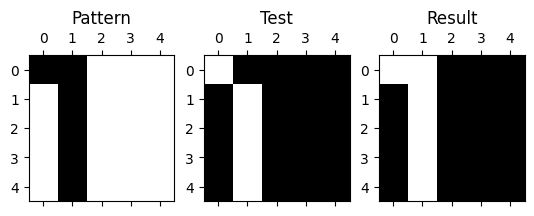

In [73]:
for i in range(len(tests)):
    p = patterns[i if i < len(patterns) else 0]
    t = tests[i]

    network.learn(p)
    r = network.recognize(tests[i])

    fig, ax = plt.subplots(1, 3)
    ax[0].matshow(p, cmap='gray_r')
    ax[0].set_title("Pattern")
    ax[1].matshow(t, cmap='gray_r')
    ax[1].set_title("Test")
    ax[2].matshow(r.reshape(5, 5), cmap='gray_r')
    ax[2].set_title("Result")